In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['processed_test_df.csv', 'processed_train_df.csv']


In [13]:
import numpy as np
import pandas as pd

train_df = pd.read_csv("../input/processed_train_df.csv")
test_df = pd.read_csv("../input/processed_test_df.csv")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
print("Trainning Set Shape: " + str(train_df.shape))
print("Testing Set Shape: " + str(test_df.shape))

Trainning Set Shape: (903653, 23)
Testing Set Shape: (804684, 22)


In [15]:
train_df.head()

,Unnamed: 0,fullVisitorId,totals.transactionRevenue,num.totals.hits,num.totals.pageviews,num.visitNumber,cat.date,cat.visitStartTime,cat.totals.bounces,cat.totals.newVisits,cat.channelGrouping,cat.device.operatingSystem,cat.geoNetwork.city,cat.geoNetwork.country,cat.geoNetwork.metro,cat.geoNetwork.networkDomain,cat.geoNetwork.region,cat.geoNetwork.subContinent,cat.trafficSource.campaign,cat.trafficSource.keyword,cat.trafficSource.medium,cat.trafficSource.referralPath,cat.trafficSource.source
0,0,1131660440785968503,0.0,1,1.0,1,8,15,0,1,4,20,378,210,0,37454,193,21,4,11,5,3196,208
1,1,377306020877927890,0.0,1,1.0,1,8,5,0,1,4,7,955,12,122,10098,482,1,4,11,5,3196,208
2,2,3895546263509774583,0.0,1,1.0,1,8,1,0,1,4,20,475,185,0,38725,99,19,4,11,5,3196,208
3,3,4763447161404445595,0.0,1,1.0,1,8,5,0,1,4,6,955,94,122,38725,482,16,4,1607,5,3196,208
4,4,27294437909732085,0.0,1,1.0,2,8,13,0,0,4,1,955,217,122,38725,482,13,4,11,5,3196,208


In [5]:
nonzero_sample = train_df.loc[train_df[train_df['totals.transactionRevenue'] != 0.0].index]
# nonzero_sample.head()
zero_indices = train_df[train_df['totals.transactionRevenue'] == 0.0].index
random_indices = np.random.choice(zero_indices, 11515, replace=False)
zero_sample = train_df.loc[random_indices]
print("Zero Samples: " + str(zero_sample.shape))
print("Non-Zero Samples: " + str(nonzero_sample.shape))

undersampled_train_df = pd.concat([nonzero_sample, zero_sample])
print("Undersampled Trainning Set: " + str(undersampled_train_df.shape))
undersampled_train_df.head()

Zero Samples: (11515, 23)
Non-Zero Samples: (11515, 23)
Undersampled Trainning Set: (23030, 23)


,Unnamed: 0,fullVisitorId,totals.transactionRevenue,num.totals.hits,num.totals.pageviews,num.visitNumber,cat.date,cat.visitStartTime,cat.totals.bounces,cat.totals.newVisits,cat.channelGrouping,cat.device.operatingSystem,cat.geoNetwork.city,cat.geoNetwork.country,cat.geoNetwork.metro,cat.geoNetwork.networkDomain,cat.geoNetwork.region,cat.geoNetwork.subContinent,cat.trafficSource.campaign,cat.trafficSource.keyword,cat.trafficSource.medium,cat.trafficSource.referralPath,cat.trafficSource.source
752,752,6194193421514403509,37860000.0,11,11.0,1,8,19,1,1,2,6,38,218,30,0,255,12,4,3327,0,3196,0
753,753,5327166854580374902,306670000.0,11,10.0,3,8,19,1,0,4,7,579,218,75,0,280,12,4,11,5,3196,208
799,799,8885051388942907862,68030000.0,13,11.0,7,8,14,1,0,6,6,579,218,75,0,280,12,4,3327,6,0,358
802,802,185467632009737931,26250000.0,13,12.0,6,8,19,1,0,6,20,540,218,100,0,73,12,4,3327,6,0,358
859,859,3244885836845029978,574150000.0,17,14.0,4,8,14,1,0,6,7,955,218,122,0,482,12,4,3327,6,0,358


In [16]:
from sklearn.preprocessing import MinMaxScaler
features = [item for item in list(train_df) if item not in ['Unnamed: 0', 'fullVisitorId', 'totals.transactionRevenue']]

# Separating out the features
x = train_df.loc[:, features]

# Separating out the target
y = train_df.loc[:, 'totals.transactionRevenue']

# Standardizing the features
x.loc[:, features] = MinMaxScaler().fit_transform(x.loc[:, features])

print("X Shape: " + str(x.shape))
x.head()

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


X Shape: (903653, 20)


,num.totals.hits,num.totals.pageviews,num.visitNumber,cat.date,cat.visitStartTime,cat.totals.bounces,cat.totals.newVisits,cat.channelGrouping,cat.device.operatingSystem,cat.geoNetwork.city,cat.geoNetwork.country,cat.geoNetwork.metro,cat.geoNetwork.networkDomain,cat.geoNetwork.region,cat.geoNetwork.subContinent,cat.trafficSource.campaign,cat.trafficSource.keyword,cat.trafficSource.medium,cat.trafficSource.referralPath,cat.trafficSource.source
0,0.0,0.002132,0.000000,0.727273,0.652174,0.0,1.0,0.571429,0.869565,0.395812,0.925110,0.0,0.892187,0.400415,0.954545,0.0,0.002040,0.833333,1.0,0.416834
1,0.0,0.002132,0.000000,0.727273,0.217391,0.0,1.0,0.571429,0.304348,1.000000,0.052863,1.0,0.240543,1.000000,0.045455,0.0,0.002040,0.833333,1.0,0.416834
2,0.0,0.002132,0.000000,0.727273,0.043478,0.0,1.0,0.571429,0.869565,0.497382,0.814978,0.0,0.922463,0.205394,0.863636,0.0,0.002040,0.833333,1.0,0.416834
3,0.0,0.002132,0.000000,0.727273,0.217391,0.0,1.0,0.571429,0.260870,1.000000,0.414097,1.0,0.922463,1.000000,0.727273,0.0,0.298089,0.833333,1.0,0.416834
4,0.0,0.002132,0.002538,0.727273,0.565217,0.0,0.0,0.571429,0.043478,1.000000,0.955947,1.0,0.922463,1.000000,0.590909,0.0,0.002040,0.833333,1.0,0.416834


In [17]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# count = 0
# for item in y:
#     if item != 0:
#         count += 1
#     else:
#         continue
# print("Sample num with a non-zero revenue: " + str(count))
# print(y.iloc[971])

log_y = np.log1p(y)
X_train, X_test, y_train, y_test = train_test_split(x, log_y, test_size=0.2)
print("X_train: " + str(X_train.shape))
print("X_test: " + str(X_test.shape))

X_train: (722922, 20)
X_test: (180731, 20)


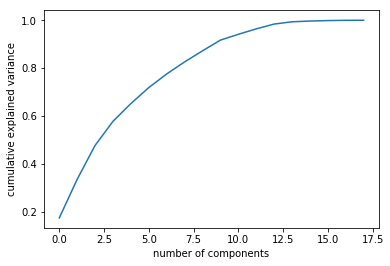

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=18)
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [19]:
pca_10 = PCA(n_components=10)
PCA_X_train = pca_10.fit_transform(X_train)
PCA_X_test = pca_10.fit_transform(X_test)

PCA_X_train = pd.DataFrame(data = PCA_X_train, columns = ["principal component %s" % i for i in range(1, 11)])
PCA_X_test = pd.DataFrame(data = PCA_X_test, columns = ["principal component %s" % i for i in range(1, 11)])

print("PCA_X_train Shape: " + str(PCA_X_train.shape))
print("PCA_X_test Shape: " + str(PCA_X_test.shape))

PCA_X_train Shape: (722922, 10)
PCA_X_test Shape: (180731, 10)


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
LR = linear_model.LinearRegression()

# Train the model using the training sets
LR.fit(PCA_X_train, y_train)

# Make predictions using the testing set
y_pred = LR.predict(PCA_X_test)

# The coefficients
print('Coefficients: \n', LR.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.18352579  0.23534053 -0.53311384  0.25189794  0.13979061  0.09605699
 -0.07966834  0.04835737 -0.12548911 -0.06598979]
Mean squared error: 3.80
Variance score: 0.03


In [22]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Fit regression model
DTreg = DecisionTreeRegressor(max_depth=2)
DTreg.fit(PCA_X_train, y_train)

# Predict
DTreg_y_pred = DTreg.predict(PCA_X_test)

# The coefficients
# print('Coefficients: \n', DTreg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, DTreg_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, DTreg_y_pred))

Mean squared error: 3.78
Variance score: 0.04
